#### Hierarchal Clustering

* We don't tell the machine how many clusters there are
* Radius/Bandwidth of a point
    * How far around a point
    * Going around, there is a radius where everything inside are points of the cluster
    * Then you recalculate the center from mean
        * New cluster center -> Then you do the same
        * Optimized when you don't have any change in set
    * Mean SHift is used

In [11]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, model_selection
import pandas as pd
import matplotlib.pyplot as plt


'''
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival Survival (0 = No; 1 = Yes)
name Name
sex Sex
age Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
ticket Ticket Number
fare Passenger Fare (British pound)
cabin Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat Lifeboat
body Body Identification Number
home.dest Home/Destination
'''

df = pd.read_excel('titanic.xls')
original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_51327/98264776.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['body','name'], 1, inplace=True)
/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_51327/98264776.py:61: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['ticket','home.dest'], 1, inplace=True)
/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_51327/98264776.py:63: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['survived'], 1).astype(float))


MeanShift()

In [12]:
labels = clf.labels_
cluster_centers = clf.cluster_centers_
original_df['cluster_group']= np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]
               
survival_rates = {}
               
n_clusters_ = len(np.unique(labels))
for i in range(n_clusters_):
    temp_df = original_df[(original_df['cluster_group'] == float(i))]
    survival_cluster = temp_df[(temp_df['survived'] == 1)]
    survival_rate = len(survival_cluster)/len(temp_df)
    survival_rates[i] = survival_rate

print(survival_rates)

{0: 0.37205523964256704, 1: 1.0, 2: 1.0, 3: 0.1, 4: 0.0, 5: 0.2727272727272727, 6: 1.0}


/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_51327/12483876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_df['cluster_group'].iloc[i] = labels[i]


In [21]:
print(original_df[(original_df['cluster_group'] == 0)].describe())

            pclass     survived         age        sibsp        parch  \
count  1231.000000  1231.000000  980.000000  1231.000000  1231.000000   
mean      2.345248     0.372055   29.423214     0.430544     0.287571   
std       0.810635     0.483549   14.193292     0.836082     0.636428   
min       1.000000     0.000000    0.166700     0.000000     0.000000   
25%       2.000000     0.000000   21.000000     0.000000     0.000000   
50%       3.000000     0.000000   28.000000     0.000000     0.000000   
75%       3.000000     1.000000   38.000000     1.000000     0.000000   
max       3.000000     1.000000   80.000000     5.000000     4.000000   

              fare        body  cluster_group  
count  1230.000000  112.000000         1231.0  
mean     24.168536  162.973214            0.0  
std      26.021296   98.946474            0.0  
min       0.000000    1.000000            0.0  
25%       7.895800   71.500000            0.0  
50%      13.000000  167.500000            0.0  
75%   

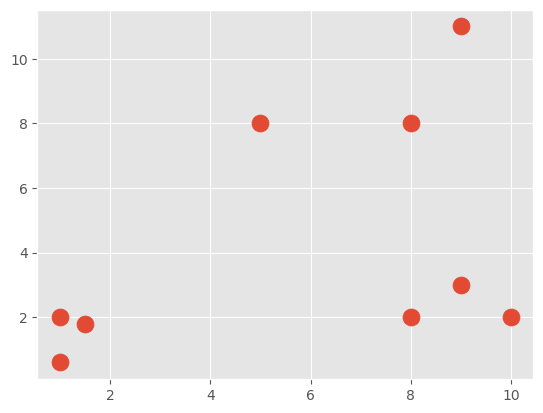

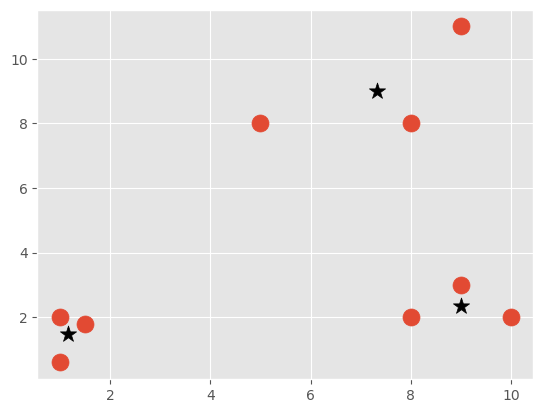

In [22]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4): #What is a good bandwidth
        self.radius = radius
    
    def fit(self, data):
        centroids = {}

        for i in range(len(data)): #Every feature is a centroid
            centroids[i] = data[i]
        while True:
            new_centroids = [] #Finding new centroids
            for i in centroids:
                in_bandwidth = [] 
                centroid = centroids[i] #Get centroid itself
                for featureset in data: #See what is in the the bandwidth of this point
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0) #Creating centroid to add
                new_centroids.append(tuple(new_centroid)) #Tuple is important later

            uniques = sorted(list(set(new_centroids))) #Don't want the same centroid
            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids: #Of there is change, we are not done yet
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids
        
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

##### Dynamic Bandwidth
* How do we know what the bandwidth is without reading data?
    * Use large radius and penalize for rither away

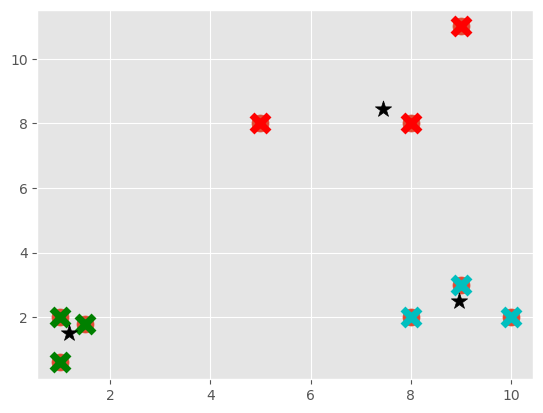

In [33]:
class mean_shift:
    def __init__(self, radius=None, radius_norm_step=100): #What is a good bandwidth
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self, data):
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
        centroids = {}

        for i in range(len(data)): #Every feature is a centroid
            centroids[i] = data[i]
        weights = [i for i in range(self.radius_norm_step)][::-1]
        while True:
            new_centroids = [] #Finding new centroids
            for i in centroids:
                in_bandwidth = [] 
                centroid = centroids[i] #Get centroid itself
                
                for featureset in data: #See what is in the the bandwidth of this point
                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.000000001
                    weight_index = int(distance/self.radius) #More penalty further away
                    if weight_index > self.radius_norm_step - 1:
                        weight_index = self.radius_norm_step - 1
                    to_add = (weights[weight_index] **2)*[featureset] #Could use value insread of list
                    in_bandwidth += to_add

                new_centroid = np.average(in_bandwidth,axis=0) #Creating centroid to add
                new_centroids.append(tuple(new_centroid)) #Tuple is important later

            uniques = sorted(list(set(new_centroids))) #Don't want the same centroid
            
            to_pop = []
            
            for i in uniques: #Wait to get rid of centroids that are very close to each other
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break
                        
                        
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                    
            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids: #Of there is change, we are not done yet
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
        # WHICH SET DOES EACH POINT BELONG TO
        for featureset in data:
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(featureset)
            
    
    def predict(self, data):
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        
clf = mean_shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color = color, s=150, linewidths=5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

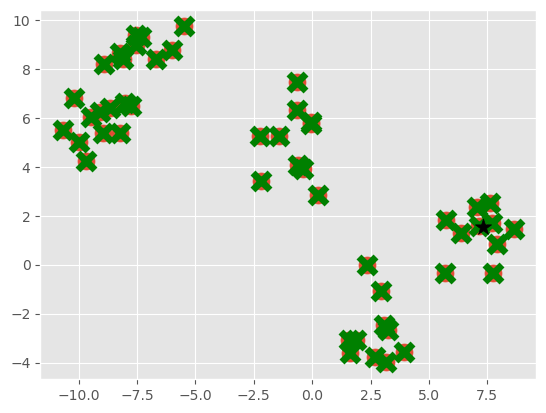

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=5, n_features=2)

clf = mean_shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=150)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', color = color, s=150, linewidths=5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()